In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [2]:
avocado = pd.read_csv(r'./avocado.csv')
avocado.drop(columns='Unnamed: 0', inplace=True)

In [3]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [4]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
avocado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
diffs = avocado['Total Bags'] - (avocado['Small Bags'] + avocado['Large Bags'] + avocado['XLarge Bags'])

In [7]:
diffs.abs().sum()

75.00000020441107

In [8]:
print( sum(diffs.abs()!=0), sum(diffs.abs() >= 0.001), sum(diffs.abs() > 1))

4036 75 0


#### Drop the unnecessary columns, if any. 

In [9]:
df = avocado.drop(columns=['Total Bags'])

In [10]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


#### Choose the 'AveragePrice' column as your target (y) variable.

In [11]:
X = avocado[avocado.columns.difference(['AveragePrice'])]
Y = avocado['AveragePrice']

#### Plot the relationship of each of the numerical features with the target variable

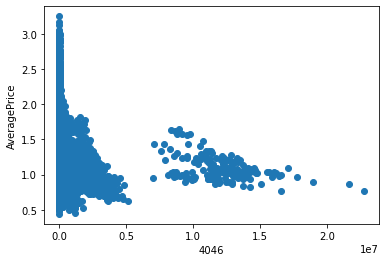

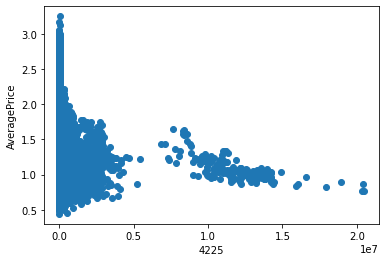

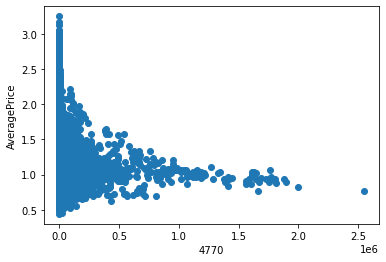

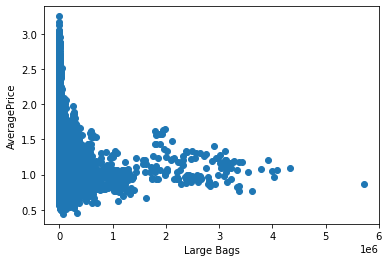

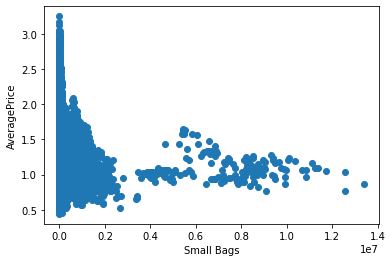

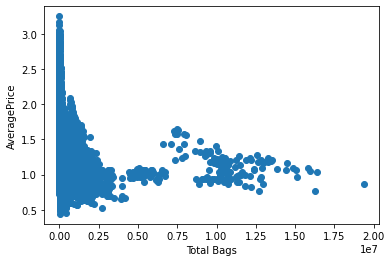

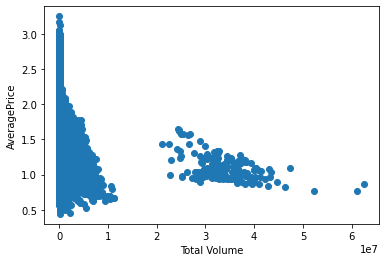

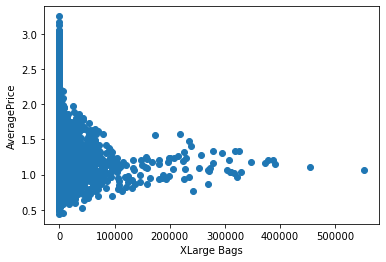

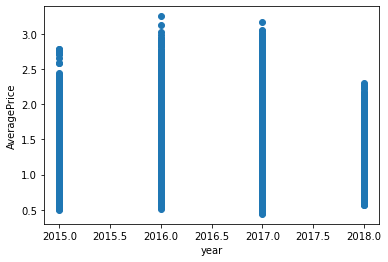

In [12]:
for numerical_column in X.select_dtypes([np.number]).columns:
    plt.scatter(X[numerical_column], Y)
    plt.xlabel(numerical_column)
    plt.ylabel('AveragePrice')
    plt.show()

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [13]:
X = X.join(pd.get_dummies(X['year']))
X.drop(columns='year', inplace=True)

In [14]:
# unique_years = np.unique(X['year'])
# for year in unique_years:
#     X['year_' + str(year)] = 0
#     X.loc[X['year'] == year, 'year_' + str(year)] = 1
# X.drop(columns='year', inplace=True)

In [15]:
X

,4046,4225,4770,Large Bags,Small Bags,Total Bags,Total Volume,XLarge Bags,region,type,2015,2016,2017,2018
0,1036.74,54454.85,48.16,93.25,8603.62,8696.87,64236.62,0.0,Albany,conventional,1,0,0,0
1,674.28,44638.81,58.33,97.49,9408.07,9505.56,54876.98,0.0,Albany,conventional,1,0,0,0
2,794.70,109149.67,130.50,103.14,8042.21,8145.35,118220.22,0.0,Albany,conventional,1,0,0,0
3,1132.00,71976.41,72.58,133.76,5677.40,5811.16,78992.15,0.0,Albany,conventional,1,0,0,0
4,941.48,43838.39,75.78,197.69,5986.26,6183.95,51039.60,0.0,Albany,conventional,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,431.85,13066.82,13498.67,17074.83,0.0,WestTexNewMexico,organic,0,0,0,1
18245,1191.70,3431.50,0.00,324.80,8940.04,9264.84,13888.04,0.0,WestTexNewMexico,organic,0,0,0,1
18246,1191.92,2452.79,727.94,42.31,9351.80,9394.11,13766.76,0.0,WestTexNewMexico,organic,0,0,0,1
18247,1527.63,2981.04,727.01,50.00,10919.54,10969.54,16205.22,0.0,WestTexNewMexico,organic,0,0,0,1


In [16]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
avocado['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [18]:
categorical_columns = ['region', 'type']
for feature in categorical_columns:
    X[feature] = pd.Categorical(X[feature]).codes
#     X.loc[:, feature] = X.loc[:, feature].astype('category').cat.codes

In [19]:
X

,4046,4225,4770,Large Bags,Small Bags,Total Bags,Total Volume,XLarge Bags,region,type,2015,2016,2017,2018
0,1036.74,54454.85,48.16,93.25,8603.62,8696.87,64236.62,0.0,0,0,1,0,0,0
1,674.28,44638.81,58.33,97.49,9408.07,9505.56,54876.98,0.0,0,0,1,0,0,0
2,794.70,109149.67,130.50,103.14,8042.21,8145.35,118220.22,0.0,0,0,1,0,0,0
3,1132.00,71976.41,72.58,133.76,5677.40,5811.16,78992.15,0.0,0,0,1,0,0,0
4,941.48,43838.39,75.78,197.69,5986.26,6183.95,51039.60,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,431.85,13066.82,13498.67,17074.83,0.0,53,1,0,0,0,1
18245,1191.70,3431.50,0.00,324.80,8940.04,9264.84,13888.04,0.0,53,1,0,0,0,1
18246,1191.92,2452.79,727.94,42.31,9351.80,9394.11,13766.76,0.0,53,1,0,0,0,1
18247,1527.63,2981.04,727.01,50.00,10919.54,10969.54,16205.22,0.0,53,1,0,0,0,1


#### Divide data into Train and Test sets with the ratio 80:20.

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Train linear Regression model using the training set

In [21]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(xTrain.to_numpy(), yTrain.to_numpy())

LinearRegression()

In [22]:
y_pred = regr.predict(xTest)
y_pred

array([1.09946182, 1.12177976, 1.59444686, ..., 1.03372316, 1.7599061 ,
       1.76079132])

In [23]:
np.array(yTest)

array([0.82, 0.97, 1.44, ..., 0.59, 1.92, 1.79])

<AxesSubplot:>

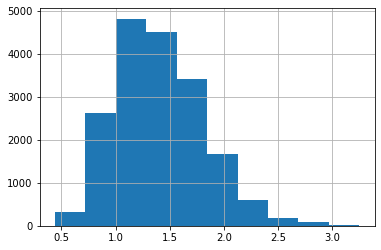

In [24]:
df['AveragePrice'].hist()

In [25]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


#### Calculate the mean squared error for the test set

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, yTest)

0.09203191523796916

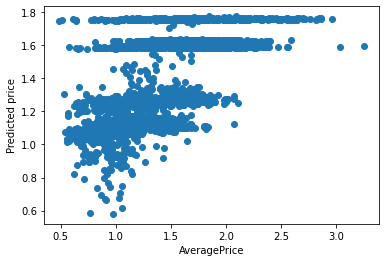

In [27]:
plt.scatter(yTest, y_pred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted price')
plt.show()

---

#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [28]:
def imp_mean_squared_error(y_test, y_pred):
    return np.sum((y_pred - y_test)**2) / len(y_pred)

def imp_mean_absolute_error(y_test, y_pred):
    return np.sum(np.abs(y_pred - y_test)) / len(y_pred)

# total sum of squares
def RSS(y_test, y_pred):
    return np.sum((y_test - y_pred)**2)

# total sum of squares
def TSS(y_test):
    # return np.sum((y_test - y_test.mean())**2)
    return RSS(y_test, y_test.mean())

def imp_r2_score(y_test, y_pred):
    return 1 - (RSS(y_test, y_pred) / TSS(y_test))

#### Compare the resulting scores of your functions and scores of corresponding sklearn functions for the test set. They should be the same.

In [29]:
print('Coefficients: \n', regr.intercept_, regr.coef_)

print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))
print('imp_mean_absolute_error: %.2f'
      % imp_mean_squared_error(yTest, y_pred), end='\n\n')

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))
print('imp_mean_squared_error: %.2f'
      % imp_mean_squared_error(yTest, y_pred), end='\n\n')

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))
print('Root mean squared error: %.2f'
      % np.sqrt(imp_mean_squared_error(yTest, y_pred)), end='\n\n')

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))
print('imp R-squared: %.2f'
      % imp_r2_score(yTest, y_pred))

Coefficients: 
 1.1472532241861104 [ 6.22663611e-05  6.24660770e-05  6.20099896e-05  2.49281463e-02
  2.49283266e-02 -2.48659320e-02 -6.23632712e-05  2.49297284e-02
  2.34798952e-04  4.89598869e-01 -1.70800703e-02 -5.41225215e-02
  1.15360057e-01 -4.41574654e-02]
Mean absolute error: 0.23
imp_mean_absolute_error: 0.09

Mean squared error: 0.09
imp_mean_squared_error: 0.09

Root mean squared error: 0.30
Root mean squared error: 0.30

R-squared: 0.43
imp R-squared: 0.43


---
### Optional tasks 

#### Choose 5 most relevant features from dataset with 'Forward Selection' (find in your slides).

In [30]:
!pip install mlxtend

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [32]:
sfs1 = sfs(regr, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2022-01-21 10:45:35] Features: 1/5 -- score: -0.10478847970529351[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2022-01-21 10:45:35] Features: 2/5 -- score: -0.09758045660187413[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-01-21 10:45:36] Features: 3/5 -- score: -0.09670569402828937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [33]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['4046', '4225', '4770', 'type', 2017]


In [34]:
new_data = X[feat_names]
new_data['AveragePrice'] = avocado['AveragePrice'] 
new_data.head()

<ipython-input-34-f08921cbf05b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['AveragePrice'] = avocado['AveragePrice']


,4046,4225,4770,type,2017,AveragePrice
0,1036.74,54454.85,48.16,0,0,1.33
1,674.28,44638.81,58.33,0,0,1.35
2,794.70,109149.67,130.50,0,0,0.93
3,1132.00,71976.41,72.58,0,0,1.08
4,941.48,43838.39,75.78,0,0,1.28


In [35]:
from sklearn.linear_model import LinearRegression

best_selected_features = []
number_of_best_features = 5
rss_scores = {}

for i in range(number_of_best_features):
    
    least_rss_score = np.inf
    least_rss_feature = None
    
    for feature in X.columns.difference(best_selected_features): # don't consider already selected features
        lin_reg = LinearRegression()
        using_featires = best_selected_features + [feature]

        lin_reg.fit(xTrain[using_featires].values, yTrain.to_numpy())

        pred = lin_reg.predict(xTest[using_featires].values)
        
        pred_rss = RSS(pred, yTest.to_numpy())
        
        if least_rss_score > pred_rss:
            least_rss_score = pred_rss
            least_rss_feature = feature

    best_selected_features.append(least_rss_feature)
    rss_scores[len(best_selected_features)] = least_rss_score

In [36]:
best_selected_features

['type', 2017, '4046', '4225', 2016]

In [37]:
for i, score in rss_scores.items():
    print(f"Best RSS score with {i} features is {score}.")

Best RSS score with 1 features is 374.2004580402592.
Best RSS score with 2 features is 347.93847097959144.
Best RSS score with 3 features is 345.2745944171189.
Best RSS score with 4 features is 339.6050698077429.
Best RSS score with 5 features is 338.6115587544771.


#### Choose 5 most relevant features from dataset with 'Backward Selection' (find in your slides).

#### What are the features that are in both of them?

In [38]:
sfs2 = sfs(regr, k_features=5, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs2 = sfs2.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished
Features: 13/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s finished
Features: 12/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished
Features: 11/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished
Features: 10/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 9/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 8/5[Parallel(n_

In [39]:
feat_names_back = list(sfs2.k_feature_names_)
print(feat_names_back)

['4225', 'Small Bags', 'Total Volume', 'type', 2017]


In [40]:
new_data = X[feat_names_back]
new_data['AveragePrice'] = avocado['AveragePrice'] 
new_data.head()

<ipython-input-40-b1cbd177d701>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['AveragePrice'] = avocado['AveragePrice']


,4225,Small Bags,Total Volume,type,2017,AveragePrice
0,54454.85,8603.62,64236.62,0,0,1.33
1,44638.81,9408.07,54876.98,0,0,1.35
2,109149.67,8042.21,118220.22,0,0,0.93
3,71976.41,5677.40,78992.15,0,0,1.08
4,43838.39,5986.26,51039.60,0,0,1.28


In [41]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

all_features = list(X.columns)
current_selected_features = all_features[:]
removed_features = []
number_of_best_features = 5
rss_scores = {}

def get_test_rss(features, xTrain, yTrain, xTest, yTest):
    lin_reg = LinearRegression()
    lin_reg.fit(xTrain[features].values, yTrain.to_numpy())
    predictions = lin_reg.predict(xTest[features].values) 
    return RSS(predictions, yTest.to_numpy())

while len(current_selected_features) != number_of_best_features:
    rss_scores[len(current_selected_features)] = get_test_rss(current_selected_features, xTrain, yTrain, xTest, yTest)
    X2 = sm.add_constant(xTrain[current_selected_features].values)
    est_ = sm.OLS(yTrain, X2)
    est2 = est_.fit()
    # print(est2.summary())
    p_values = est2.summary2().tables[1]['P>|t|'][1:]
    highest_p_feature = p_values.argmax()
    current_selected_features.pop(highest_p_feature)
    
rss_scores[len(current_selected_features)] = get_test_rss(current_selected_features, xTrain, yTrain, xTest, yTest)


In [42]:
for i, score in rss_scores.items():
    print(f"Best RSS score with {i} features is {score}.")

Best RSS score with 14 features is 335.91649061858743.
Best RSS score with 13 features is 335.86377849087984.
Best RSS score with 12 features is 335.97539460045414.
Best RSS score with 11 features is 336.28841134953626.
Best RSS score with 10 features is 336.5312092901382.
Best RSS score with 9 features is 336.71200815361595.
Best RSS score with 8 features is 337.4648762939145.
Best RSS score with 7 features is 340.54360027611847.
Best RSS score with 6 features is 345.42488994055077.
Best RSS score with 5 features is 346.843279757911.


In [43]:
current_selected_features

['type', 2015, 2016, 2017, 2018]

In [44]:
set(feat_names).intersection(feat_names_back)

{2017, '4225', 'type'}

In [45]:
set(best_selected_features).intersection(current_selected_features)

{2016, 2017, 'type'}